# Carpetas de investigación FGJ de la Ciudad de México

Esta base de datos contiene la información actualizada de las carpetas de investigación de la Fiscalía General de Justicia (FGJ) de la Ciudad de México a partir de enero de 2016. Las variables que contiene esta base son Carpetas de investigación de delitos a nivel de calle de la FGJ por Fiscalía, Agencia, Unidad de Investigación, fecha de apertura de la carpeta de investigación, delito, categoría de delito, calle, colonia, alcaldía, coordenadas, mes y año. Esta información se actualiza mensualmente. Los datos de esta base fueron actualizados por la FGJ el 29 de julio de 2020.

# Librerías¶

In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings('ignore')

# Datos

In [2]:
url = "https://archivo.datos.cdmx.gob.mx/fiscalia-general-de-justicia/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico/carpetas_completa_julio_2021.csv"
datos = pd.read_csv(url, sep=",")

# Análisis exploratorio

Antes de realizar cualquier cálculo o modelado de un nuevo conjunto de datos, es muy importante realizar un análisis exploratorio de los mismos. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores como:

- Una variable que se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.

- Una variable contiene valores que no tienen sentido: para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.

- En una variable de tipo numérico se haya introducido una palabra en lugar de un número.

## Muestra de los primeros 5 registros

In [3]:
datos.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


In [4]:
datos[datos['calle_hechos'].isnull()]

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
516,2014.0,Enero,2014-01-17 12:00:00,2016,Febrero,2016-02-04 11:05:21,DENUNCIA DE HECHOS,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS FINA...,T,UI-1SD,HECHO NO DELICTIVO,NaN,NaN,CONDESA,CUAUHTEMOC,NaN,-99.177778,19.415092,NaN
613,2016.0,Febrero,2016-02-03 12:00:00,2016,Febrero,2016-02-04 17:57:31,DELITOS AMBIENTALES,INVESTIGACIÓN EN DELITOS AMBIENTALES Y EN MATE...,DA-1,UI-1CD,DELITO DE BAJO IMPACTO,NaN,NaN,NaN,TLAHUAC,NaN,NaN,NaN,NaN
823,2016.0,Febrero,2016-02-05 18:25:00,2016,Febrero,2016-02-05 18:31:22,LESIONES INTENCIONALES POR ARMA DE FUEGO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-3,UI-2CD,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,NaN,NaN,NaN,ECATEPEC DE MORELOS,NaN,NaN,NaN,NaN
961,2016.0,Febrero,2016-02-06 09:00:00,2016,Febrero,2016-02-06 16:11:33,PERDIDA DE LA VIDA POR CAIDA,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-3,UI-3CD,HECHO NO DELICTIVO,NaN,NaN,LOS ALPES,ALVARO OBREGON,NaN,-99.194284,19.361451,NaN
1303,2016.0,Enero,2016-01-21 11:01:00,2016,Febrero,2016-02-08 19:26:05,ABANDONO DE PERSONA,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",A,UI-5SD,DELITO DE BAJO IMPACTO,NaN,NO REFIERE LAS CALLES,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.053613,19.357255,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267838,2021.0,Julio,2021-07-30 06:30:00,2021,Julio,2021-07-30 15:44:25,ROBO DE OBJETOS,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,UAT-IZP-5,5 SIN DETENIDO,DELITO DE BAJO IMPACTO,NaN,NaN,CONSTITUCIÓN DE 1917,IZTAPALAPA,FUERO COMUN,-99.063573,19.346163,NaN
1267931,2021.0,Julio,2021-07-29 16:30:00,2021,Julio,2021-07-30 18:01:10,CORRUPCIÓN DE PERSONAS MENORES DE EDAD O PERSO...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MIGUE...,H1,UI-1SD,DELITO DE BAJO IMPACTO,NaN,NaN,NaN,NAUCALPAN DE JUAREZ,INCOMPETENCIA,NaN,NaN,NaN
1267959,2021.0,Julio,2021-07-30 12:45:00,2021,Julio,2021-07-30 18:32:03,FRAUDE,FISCALÍA PARA LA INVESTIGACIÓN DE LOS DELITOS ...,B,UI-3CD,DELITO DE BAJO IMPACTO,NaN,NaN,DOCTORES,CUAUHTEMOC,FUERO COMUN,-99.148949,19.427159,NaN
1268162,2021.0,Julio,2021-07-30 21:30:00,2021,Julio,2021-07-31 00:18:06,LESIONES INTENCIONALES POR ARMA DE FUEGO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MAGDA...,MC-2,UI-3CD,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,NaN,NaN,NaN,COYOACAN,FUERO COMUN,NaN,NaN,NaN


## Tipo de dato por columna

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268638 entries, 0 to 1268637
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1268202 non-null  float64
 1   mes_hechos            1268202 non-null  object 
 2   fecha_hechos          1268202 non-null  object 
 3   ao_inicio             1268638 non-null  int64  
 4   mes_inicio            1268638 non-null  object 
 5   fecha_inicio          1268635 non-null  object 
 6   delito                1268638 non-null  object 
 7   fiscalia              1268636 non-null  object 
 8   agencia               1268638 non-null  object 
 9   unidad_investigacion  1268411 non-null  object 
 10  categoria_delito      1268638 non-null  object 
 11  calle_hechos          1265456 non-null  object 
 12  calle_hechos2         494191 non-null   object 
 13  colonia_hechos        1216314 non-null  object 
 14  alcaldia_hechos       1265050 non-

## Número de observaciones y valores ausentes

Es básico conocer el número de observaciones disponibles y si todas ellas están completas. Este análisis sirve ya que a la hora de crear modelos, la mayoría de los algoritmos no acepta observaciones incompletas o se ven influenciados por ellas. Aunque la imputación de valores ausentes es parte del preprocesado este se tiene que realizar antes de separar los datos para asegurar que se establecen todas las estrategias de imputación necesarias.

**Dimensión del conjunto de datos**

In [6]:
datos.shape

(1268638, 19)

Como podemos observar el conjunto de datos tiene 1,268,638 registros y 19 columnas.

**Validar si  tiene registros duplicados**

In [7]:
datos.duplicated().any()

False

El conjunto de datos no contiene registros duplicados.

**Validar si tiene nulos**

In [8]:
datos.isnull().any().sort_values()

ao_inicio               False
mes_inicio              False
delito                  False
agencia                 False
categoria_delito        False
ao_hechos                True
longitud                 True
competencia              True
alcaldia_hechos          True
colonia_hechos           True
calle_hechos2            True
unidad_investigacion     True
latitud                  True
fiscalia                 True
fecha_inicio             True
fecha_hechos             True
mes_hechos               True
calle_hechos             True
tempo                    True
dtype: bool

**Número de datos ausentes por variable**

In [9]:
(datos.isna().sum().sort_values()/datos.shape[0])*100

categoria_delito          0.000000
agencia                   0.000000
ao_inicio                 0.000000
mes_inicio                0.000000
delito                    0.000000
fiscalia                  0.000158
fecha_inicio              0.000236
unidad_investigacion      0.017893
ao_hechos                 0.034368
mes_hechos                0.034368
fecha_hechos              0.034368
calle_hechos              0.250820
alcaldia_hechos           0.282823
latitud                   4.048988
longitud                  4.048988
colonia_hechos            4.124423
calle_hechos2            61.045546
competencia              83.875700
tempo                   100.000000
dtype: float64

De la lista anterir podemos observar lo siguiente:
- La variable ``tempo`` el 100% de valores es *NaN*, por lo que no se debe considerar en el análisis.
- Las variables ``competencia`` y ``calle_hechos2`` tiene un 84% y 61% de valores *NaN* respectivamente, por tal, aportaran muy poca información para explicar el análisis.
- Las variables ``colonia_hechos``, ``longitud`` y ``latitud`` aunque tienen menos del 5% de valores *NaN*, se debería revisar por que no se tiene el dato ya que esta información es de suma importancia para identificar zonas con alta incidencia delictiva.

## Análisis de variables numéricas

In [10]:
datos.select_dtypes(include=['number']).describe()

,ao_hechos,ao_inicio,longitud,latitud,tempo
count,1.268202e+06,1.268638e+06,1.217271e+06,1.217271e+06,0.0
mean,2.018189e+03,2.018341e+03,-9.913721e+01,1.938723e+01,NaN
std,1.875047e+00,1.571532e+00,5.994630e-02,6.996396e-02,NaN
min,1.906000e+03,2.016000e+03,-1.002319e+02,1.909535e+01,NaN
25%,2.017000e+03,2.017000e+03,-9.917558e+01,1.933955e+01,NaN
50%,2.018000e+03,2.018000e+03,-9.914210e+01,1.938976e+01,NaN
75%,2.020000e+03,2.020000e+03,-9.909967e+01,1.943771e+01,NaN
max,2.021000e+03,2.021000e+03,-9.894686e+01,1.958333e+01,NaN


El análisis de variables numéricas nos ayudo a identificar que el campo *ao_hechos* tiene datos fuera del rango del estudio, por lo que se filtrara solo las fechas: *2016, 2017, 2018, 2019, 2020*.

In [11]:
datos = datos[datos.ao_hechos.isin([2016, 2017, 2018, 2019, 2020])]
datos.ao_hechos.unique()

array([2016., 2017., 2018., 2019., 2020.])

## Análisis de variables cualitativas

In [12]:
datos.select_dtypes(include=['object']).describe()

,mes_hechos,fecha_hechos,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia
count,1120127,1120127,1120127,1120124,1120127,1120125,1120127,1119936,1120127,1117318,442865,1075369,1117188,84147
unique,12,362774,12,1034890,342,73,174,120,18,235847,106614,1654,504,3
top,Octubre,2017-10-16 12:00:00,Octubre,2018-09-12 18:00:00,VIOLENCIA FAMILIAR,INVESTIGACIÓN EN IZTAPALAPA,CUH-2,UI-1SD,DELITO DE BAJO IMPACTO,CALZADA DE TLALPAN,.,CENTRO,CUAUHTEMOC,FUERO COMUN
freq,100347,242,102236,8,111063,113262,40269,296743,868981,4813,2578,36570,173308,81987


Como podemos observar se tiene 345 delitos distintos y 551 alcaldias. Por lo que nuestro estudio se enfocará sólo en las alcaldias: *'ALVARO OBREGON', 'AZCAPOTZALCO', 'BENITO JUAREZ', 'COYOACAN', 'CUAJIMALPA DE MORELOS', 'CUAUHTEMOC', 'GUSTAVO A MADERO', 'IZTACALCO', 'IZTAPALAPA', 'LA MAGDALENA CONTRERAS', 'MIGUEL HIDALGO',  'MILPA ALTA', 'TLAHUAC',   'TLALPAN',  'VENUSTIANO CARRANZA' y 'XOCHIMILCO'*.

In [13]:
datos_cdmx = datos[datos.alcaldia_hechos.isin(['ALVARO OBREGON', 'AZCAPOTZALCO', 'BENITO JUAREZ', 'COYOACAN', 'CUAJIMALPA DE MORELOS'
                                   , 'CUAUHTEMOC', 'GUSTAVO A MADERO', 'IZTACALCO', 'IZTAPALAPA', 'LA MAGDALENA CONTRERAS'
                                   , 'MIGUEL HIDALGO', 'MILPA ALTA', 'TLAHUAC', 'TLALPAN', 'VENUSTIANO CARRANZA'
                                   , 'XOCHIMILCO'])]

In [14]:
datos_cdmx.alcaldia_hechos.unique()

array(['BENITO JUAREZ', 'IZTAPALAPA', 'CUAUHTEMOC', 'TLAHUAC',
       'IZTACALCO', 'GUSTAVO A MADERO', 'MIGUEL HIDALGO', 'TLALPAN',
       'ALVARO OBREGON', 'VENUSTIANO CARRANZA', 'AZCAPOTZALCO',
       'CUAJIMALPA DE MORELOS', 'COYOACAN', 'XOCHIMILCO',
       'LA MAGDALENA CONTRERAS', 'MILPA ALTA'], dtype=object)

Ahora creamos las columnas ``dia_semana`` y ``anio_mes``.

In [15]:
datos_cdmx['Date'] = pd.to_datetime(datos_cdmx['fecha_hechos'], format='%Y/%m/%d')
datos_cdmx['dia_semana'] = datos_cdmx['Date'].dt.dayofweek
datos_cdmx['mes'] = datos_cdmx['Date'].dt.month
datos_cdmx['anio_mes'] = datos_cdmx['Date'].dt.to_period('M')
datos_cdmx['ao_hechos'] = datos_cdmx['ao_hechos'].astype(int)
datos_cdmx['conteo'] = 1

In [16]:
datos_cdmx.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,...,alcaldia_hechos,competencia,longitud,latitud,tempo,Date,dia_semana,mes,anio_mes,conteo
0,2016,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,...,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN,2016-01-31 22:16:00,6,1,2016-01,1
1,2016,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,...,IZTAPALAPA,NaN,-99.108403,19.352859,NaN,2016-01-31 20:50:00,6,1,2016-01,1
2,2016,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,...,IZTAPALAPA,NaN,-99.061321,19.356451,NaN,2016-02-01 00:30:00,0,2,2016-02,1
3,2016,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,...,IZTAPALAPA,NaN,-98.976379,19.331633,NaN,2016-01-31 22:00:00,6,1,2016-01,1
5,2016,Febrero,2016-02-01 01:30:00,2016,Febrero,2016-02-01 02:19:12,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-3CD,...,CUAUHTEMOC,NaN,-99.174075,19.421356,NaN,2016-02-01 01:30:00,0,2,2016-02,1


## Identifica los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos con pocas ocurrencias)

In [17]:
tabla_delito = pd.pivot_table(data=datos_cdmx
                              , index = ['delito']
                              , columns= ['ao_hechos'] 
                              , values = ['conteo']
                              , aggfunc= sum
                              , fill_value=0)
tabla_delito.head()

conteo                    \
ao_hechos                                            2016  2017  2018  2019   
delito                                                                        
ABANDONO DE PERSONA                                   603   656   566     0   
ABORTO                                                114    81   111   133   
ABUSO DE AUTORIDAD                                   1236  1287  1679     0   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...      4    13    85  2170   
ABUSO DE CONFIANZA                                   3230  3790  3971  3787   

                                                          
ao_hechos                                           2020  
delito                                                    
ABANDONO DE PERSONA                                    0  
ABORTO                                                80  
ABUSO DE AUTORIDAD                                     0  
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...  1911  
ABUSO DE CONFIANZA                                  3529

In [18]:
subida = tabla_delito.reindex(tabla_delito['conteo'].sort_values(by=[2020,2019], ascending=False).index)
subida.head(30)

conteo                \
ao_hechos                                            2016   2017   2018   
delito                                                                    
VIOLENCIA FAMILIAR                                  18004  18484  19999   
AMENAZAS                                             9939   9499  11124   
FRAUDE                                              10762  11612  13439   
ROBO DE OBJETOS                                     14931  15996  14287   
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA       6292   7024  21959   
ROBO DE ACCESORIOS DE AUTO                           3796   7104   8974   
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIEN...      0      0      0   
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIO...   5638   5117   7131   
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO          3842   7493   8547   
ROBO A NEGOCIO SIN VIOLENCIA                        13429  14858  15986   
NARCOMENUDEO POSESION SIMPLE                          830   1874   5053   
DESPOJO                                              3242   3424   3658   
ABUSO DE CONFIANZA                                   3230   3790   3971   
ROBO A CASA HABITACION SIN VIOLENCIA                 5751   6219   6948   
ABUSO SEXUAL                                         1880   1729   2709   
USURPACIÓN DE IDENTIDAD                              2287   1908   2563   
PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCIÓ...      9     25    435   
DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VE...   3610   3512   3636   
LESIONES INTENCIONALES POR GOLPES                    2381   2704   2901   
ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIO...   1305   2167   3248   
TENTATIVA DE EXTORSION                               1215   1061   1547   
ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIO...   1984   2167   3114   
DAÑO EN PROPIEDAD AJENA INTENCIONAL                  2143   2910   2817   
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PU...      4     13     85   
LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COL...   3050   2954   2594   
ROBO A NEGOCIO CON VIOLENCIA                         2453   2862   4855   
ENCUBRIMIENTO                                         955   1039   1048   
ROBO A REPARTIDOR CON VIOLENCIA                      1046   1295   1724   
ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA        800   1165   2203   
ROBO DE VEHICULO DE PEDALES                          1041   1512   1696   

                                                                  
ao_hechos                                            2019   2020  
delito                                                            
VIOLENCIA FAMILIAR                                  25700  27972  
AMENAZAS                                            13773  14350  
FRAUDE                                              14091  13091  
ROBO DE OBJETOS                                     12474   9069  
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA      13272   8622  
ROBO DE ACCESORIOS DE AUTO                           8195   7399  
ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIEN...     28   6160  
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIO...   6451   5103  
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO          6630   4923  
ROBO A NEGOCIO SIN VIOLENCIA                        15753   4448  
NARCOMENUDEO POSESION SIMPLE                         5020   4211  
DESPOJO                                              3859   3890  
ABUSO DE CONFIANZA                                   3787   3529  
ROBO A CASA HABITACION SIN VIOLENCIA                 5938   3458  
ABUSO SEXUAL                                         3903   2915  
USURPACIÓN DE IDENTIDAD                              3593   2820  
PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCIÓ...   5694   2670  
DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VE...   3697   2610  
LESIONES INTENCIONALES POR GOLPES                    3403   2378  
ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIO...   3776   2336  
TENTATIVA DE EXTORSION            

Ordenenado de mayor a menor por el año 2020 para compararlo con el año 2019, observamos que los delitos que más incrementaron fueron:
- VIOLENCIA FAMILIAR.
- AMENAZAS.
- ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO).

Este último con un incremento muy marcado


Ahora para medir los delitos que han caído se ordenaron de mayor a menor los delitos ocurridos en los años 2018, 2019 y 2020, con la finalidad de el patrón de disminución conforme pasan los años. Podemos notar que los delitos que han disminuido son:
- ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA.
- ROBO A NEGOCIO SIN VIOLENCIA.
- ROBO DE OBJETOS.
- ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO.
- DENUNCIA DE HECHOS.
- FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO.
- ROBO A CASA HABITACION SIN VIOLENCIA.
- ROBO A NEGOCIO CON VIOLENCIA.

Por mencionar algunos ya que se observa una disminución más marcada relacionada a los temas de Pandemia.

In [19]:
bajada = tabla_delito.reindex(tabla_delito['conteo'].sort_values(by=[2018,2019,2020], ascending=False).index)
bajada.head(30)

conteo                \
ao_hechos                                            2016   2017   2018   
delito                                                                    
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA       6292   7024  21959   
VIOLENCIA FAMILIAR                                  18004  18484  19999   
ROBO A NEGOCIO SIN VIOLENCIA                        13429  14858  15986   
ROBO DE OBJETOS                                     14931  15996  14287   
FRAUDE                                              10762  11612  13439   
AMENAZAS                                             9939   9499  11124   
ROBO DE ACCESORIOS DE AUTO                           3796   7104   8974   
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO          3842   7493   8547   
DENUNCIA DE HECHOS                                  11099  16438   7585   
FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENT...   4577   6473   7202   
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIO...   5638   5117   7131   
ROBO A CASA HABITACION SIN VIOLENCIA                 5751   6219   6948   
NARCOMENUDEO POSESION SIMPLE                          830   1874   5053   
ROBO A NEGOCIO CON VIOLENCIA                         2453   2862   4855   
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA        620   1794   4278   
ABUSO DE CONFIANZA                                   3230   3790   3971   
DESPOJO                                              3242   3424   3658   
DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VE...   3610   3512   3636   
ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIO...   1305   2167   3248   
ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIO...   1984   2167   3114   
LESIONES INTENCIONALES POR GOLPES                    2381   2704   2901   
DAÑO EN PROPIEDAD AJENA INTENCIONAL                  2143   2910   2817   
ABUSO SEXUAL                                         1880   1729   2709   
LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COL...   3050   2954   2594   
USURPACIÓN DE IDENTIDAD                              2287   1908   2563   
ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA        800   1165   2203   
ROBO DE DINERO                                       1897   2151   2011   
LESIONES INTENCIONALES POR ARMA DE FUEGO             1347   1872   1988   
DAÑO EN PROPIEDAD AJENA CULPOSA                      1881   2202   1954   
ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA           3578   5716   1797   

                                                                  
ao_hechos                                            2019   2020  
delito                                                            
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA      13272   8622  
VIOLENCIA FAMILIAR                                  25700  27972  
ROBO A NEGOCIO SIN VIOLENCIA                        15753   4448  
ROBO DE OBJETOS                                     12474   9069  
FRAUDE                                              14091  13091  
AMENAZAS                                            13773  14350  
ROBO DE ACCESORIOS DE AUTO                           8195   7399  
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO          6630   4923  
DENUNCIA DE HECHOS                                    664     11  
FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENT...      0      0  
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIO...   6451   5103  
ROBO A CASA HABITACION SIN VIOLENCIA                 5938   3458  
NARCOMENUDEO POSESION SIMPLE                         5020   4211  
ROBO A NEGOCIO CON VIOLENCIA                         5020   1854  
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA       2387    657  
ABUSO DE CONFIANZA                                   3787   3529  
DESPOJO                                              3859   3890  
DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VE...   3697   2610  
ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIO...   3776   2336  
ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIO...   2679   2141  
LESIONES INTENCIONALES POR GOLPES 

## ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?¿Por qué crees que sea esto?

In [20]:
tabla_alcaldia = pd.pivot_table(data=datos_cdmx
                              , index = ['ao_hechos']
                              , columns= ['alcaldia_hechos'] 
                              , values = ['conteo']
                              , aggfunc= sum
                              , fill_value=0)
tabla_alcaldia

conteo                                      \
alcaldia_hechos ALVARO OBREGON AZCAPOTZALCO BENITO JUAREZ COYOACAN   
ao_hechos                                                            
2016                     12336        10067         16503    13598   
2017                     14350        11308         20160    15281   
2018                     16702        12202         22490    16973   
2019                     17948        10835         19887    15648   
2020                     14720        10038         14739    13296   

                                                                             \
alcaldia_hechos CUAJIMALPA DE MORELOS CUAUHTEMOC GUSTAVO A MADERO IZTACALCO   
ao_hechos                                                                     
2016                             2809      31775            18976      8066   
2017                             3081      36854            22724      9688   
2018                             3505      40769            25343     11001   
2019                             3730      36648            24249     10129   
2020                             3274      27262            21370      7998   

                                                                             \
alcaldia_hechos IZTAPALAPA LA MAGDALENA CONTRERAS MIGUEL HIDALGO MILPA ALTA   
ao_hechos                                                                     
2016                 29273                   3061          12594       1132   
2017                 33394                   3226          15678       1437   
2018                 37511                   3621          16631       1771   
2019                 38169                   4013          15973       1673   
2020                 31043                   3979          12345       1742   

                                                                
alcaldia_hechos TLAHUAC TLALPAN VENUSTIANO CARRANZA XOCHIMILCO  
ao_hechos                                                       
2016               4166   11608               10864       6196  
2017               5171   12669               12781       6888  
2018               5843   14446               15081       7567  
2019               5990   14413               14475       7385  
2020               5845   12444               11654       6953

<AxesSubplot:xlabel='ao_hechos'>

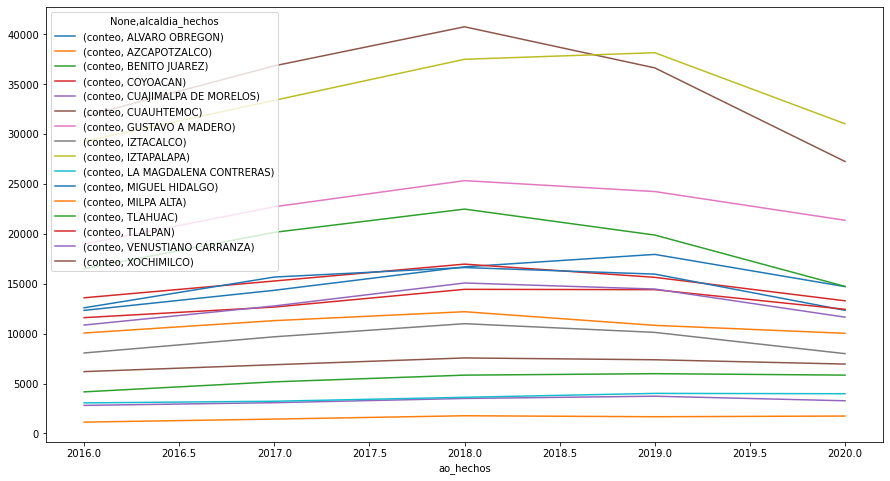

In [21]:
fix, ax = plt.subplots(figsize=(15,8))
tabla_alcaldia.plot(ax=ax)

De la gráfica anterior podemos notar que las alcaldías que **más delitos** tienen en los 2 últmos años son ``IZTAPALAPA``, seguida de ``CUAUHTEMOC``. ``IZTAPALAPA`` por temas de sobre población y socio-económicos y ``CUAUHTEMOC`` por ser la zona de centro y por la concurrencia en la zona.
Para poder explicar más a fondo se tendrían que desglosar los delitos que ocurren y las zonas donde estos se dan.

Por otro lado tambien se observa en la misma gráfica que las alcaldías que **menos delitos** tienen en los 2 últmos años son ``MILPA ALTA``, ``CUAJIMALPA DE MORELOS`` y ``LA MAGDALENA CONTRERAS`` el por que tienen menos delitos es dado que son las alcaldías menos sobre pobladas y las que están más alejadas del centro de la CDMX. De igual manera, para poder explicar más a fondo se tendrían que desglosar los delitos que ocurren y las zonas donde estos se dan.

## ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX? ¿A qué crees que se deba?

Por día de la semana:

In [22]:
tabla_dia = pd.pivot_table(data=datos_cdmx
                              , index = ['dia_semana']
                              , values = ['conteo']
                              , aggfunc= sum
                              , fill_value=0)
tabla_dia

,conteo
dia_semana,
0,165821
1,164770
2,166298
3,163708
4,172631
5,145215
6,130594


<AxesSubplot:xlabel='dia_semana'>

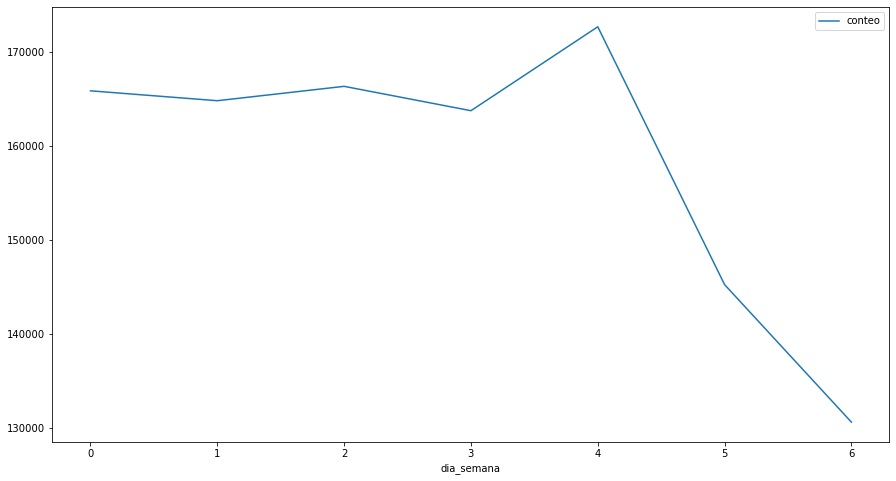

In [23]:
fix, ax = plt.subplots(figsize=(15,8))
tabla_dia.plot(ax=ax)

El valor **dia_semana = 0** corresponde al día *Lunes*, por lo que podemos notar que el día donde se comenten más delitos es el **Viernes**. Además se observa una cantidad muy similar de delitos cometidas entre los días **Lunes - Jueves**. Y por otro lado observamos una caída muy marcada entre el día **Sábado** y se extiende hasta el día **Domingo**.

Considero que esto se debe a la vida social que se da el viernes, claro que se deben analizar el tipo de delito y las zonas para poder probar esta hipótesis.

Por mes tenemos:

In [24]:
tabla_mes = pd.pivot_table(data=datos_cdmx
                              , index = ['anio_mes']
                              , values = ['conteo']
                              , aggfunc= sum
                              , fill_value=0)
tabla_mes.head()

,conteo
anio_mes,
2016-01,14981
2016-02,15346
2016-03,15834
2016-04,16233
2016-05,16322


<AxesSubplot:xlabel='anio_mes'>

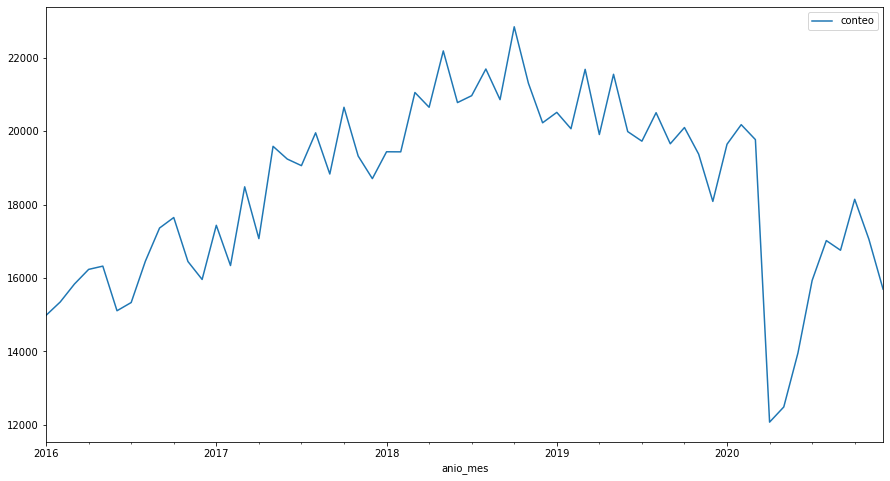

In [25]:
fix, ax = plt.subplots(figsize=(15,8))
tabla_mes.plot(ax=ax)

En la gráfica anterior se observa que los delitos muestran una tendencia a subir entre los años 2016 al 2018. Donde en el mes de Noviembre de 2018 comenzaron a disminuir durante el 2019 y teniendo un repunte los primeros 3 meses del 2020. También en el 2020 se dió la caída muy marcada relacionada al inicio de la pandemía del COVID-19.

In [26]:
tabla_mes_ = pd.pivot_table(data=datos_cdmx
                              , index = ['mes']
                              , values = ['conteo']
                              , aggfunc= sum
                              , fill_value=0)
tabla_mes_.head()

,conteo
mes,
1,92013
2,91366
3,96830
4,85936
5,92132


<AxesSubplot:xlabel='mes'>

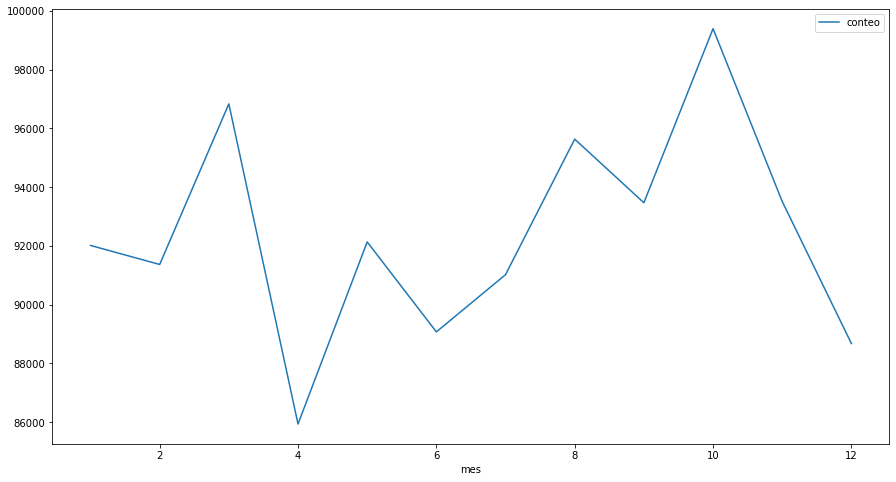

In [27]:
fix, ax = plt.subplots(figsize=(15,8))
tabla_mes_.plot(ax=ax)

Analizando la ocurrencia por mes, sin considerar los años observamos que los meses donde se dan más los delitos son:
- Octubre (No me queda claro a que se debe, tendría que revisar el tipo de delito y donde ocurrieron).
- Marzo y Agosto parecieran temas de vacaciones y temas relacionados a la compra de útiles para los hijos. De igual manera hay que revisa más a fondo los tipos de delitos y el lugar donde ocurrieron.

## ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [28]:
tabla_alcaldia_delito = pd.pivot_table(data=datos_cdmx
                              , index = ['delito','alcaldia_hechos'] 
                              , columns= ['ao_hechos'] 
                              , values = ['conteo']
                              , aggfunc= sum
                              , fill_value=0 
                              , margins= True)
tabla_alcaldia_delito

conteo                          \
ao_hechos                                    2016    2017    2018    2019   
delito              alcaldia_hechos                                         
ABANDONO DE PERSONA ALVARO OBREGON             42      42      38       0   
                    AZCAPOTZALCO               23      33      19       0   
                    BENITO JUAREZ              50      42      50       0   
                    COYOACAN                   37      40      38       0   
                    CUAJIMALPA DE MORELOS       7       5       6       0   
...                                           ...     ...     ...     ...   
VIOLENCIA FAMILIAR  TLAHUAC                   726     824     894    1051   
                    TLALPAN                  1372    1486    1608    1875   
                    VENUSTIANO CARRANZA       949     944    1216    1568   
                    XOCHIMILCO                875    1093     989    1178   
All                                        193024  224690  251456  241165   

                                                            
ao_hechos                                    2020      All  
delito              alcaldia_hechos                         
ABANDONO DE PERSONA ALVARO OBREGON              0      122  
                    AZCAPOTZALCO                0       75  
                    BENITO JUAREZ               0      142  
                    COYOACAN                    0      115  
                    CUAJIMALPA DE MORELOS       0       18  
...                                           ...      ...  
VIOLENCIA FAMILIAR  TLAHUAC                  1272     4767  
                    TLALPAN                  1854     8195  
                    VENUSTIANO CARRANZA      1573     6250  
                    XOCHIMILCO               1499     5634  
All                                        198702  1109037  

[4275 rows x 6 columns]

In [29]:
alcal_deli = tabla_alcaldia_delito.reindex(tabla_alcaldia_delito['conteo'].sort_values(by=['All'],ascending=False).index)
alcal_deli.head(60)

conteo  \
ao_hechos                                                                    2016   
delito                                             alcaldia_hechos                  
All                                                                        193024   
VIOLENCIA FAMILIAR                                 IZTAPALAPA                3837   
FRAUDE                                             CUAUHTEMOC                2889   
ROBO DE OBJETOS                                    CUAUHTEMOC                2931   
VIOLENCIA FAMILIAR                                 GUSTAVO A MADERO          1879   
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA     IZTAPALAPA                1432   
ROBO A NEGOCIO SIN VIOLENCIA                       CUAUHTEMOC                2121   
                                                   IZTAPALAPA                2115   
AMENAZAS                                           IZTAPALAPA                1753   
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA     CUAUHTEMOC                 994   
VIOLENCIA FAMILIAR                                 CUAUHTEMOC                1491   
ROBO DE OBJETOS                                    IZTAPALAPA                1840   
FRAUDE                                             BENITO JUAREZ             1497   
VIOLENCIA FAMILIAR                                 ALVARO OBREGON            1303   
                                                   TLALPAN                   1372   
AMENAZAS                                           CUAUHTEMOC                1374   
ROBO DE ACCESORIOS DE AUTO                         BENITO JUAREZ              673   
ROBO A NEGOCIO SIN VIOLENCIA                       BENITO JUAREZ             1574   
DENUNCIA DE HECHOS                                 CUAUHTEMOC                2582   
VIOLENCIA FAMILIAR                                 COYOACAN                  1219   
ROBO A NEGOCIO SIN VIOLENCIA                       GUSTAVO A MADERO          1385   
VIOLENCIA FAMILIAR                                 IZTACALCO                 1172   
                                                   VENUSTIANO CARRANZA        949   
FRAUDE                                             MIGUEL HIDALGO            1228   
ROBO DE ACCESORIOS DE AUTO                         CUAUHTEMOC                 496   
ROBO DE OBJETOS                                    MIGUEL HIDALGO            1686   
AMENAZAS                                           GUSTAVO A MADERO           879   
ROBO DE OBJETOS                                    BENITO JUAREZ             1346   
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA     GUSTAVO A MADERO           771   
VIOLENCIA FAMILIAR                                 XOCHIMILCO                 875   
FRAUDE                                             IZTAPALAPA                 898   
ROBO DE OBJETOS                                    GUSTAVO A MADERO           910   
DENUNCIA DE HECHOS                                 IZTAPALAPA                1465   
VIOLENCIA FAMILIAR                                 AZCAPOTZALCO               757   
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIO... IZTAPALAPA                 848   
ROBO DE OBJETOS                                    COYOACAN                  1091   
ROBO A NEGOCIO SIN VIOLENCIA                       COYOACAN                  1161   
ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA     CUAUHTEMOC                 428   
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA     MIGUEL HIDALGO             343   
VIOLENCIA FAMILIAR                                 TLAHUAC                    726   
FRAUDE                                             GUSTAVO A MADERO           732   
ROBO A NEGOCIO SIN VIOLENCIA                       MIGUEL HIDALGO             812   
FRAUDE                                             COYOACAN                   706   
AMENAZAS                                           TLALPAN                    661   
                                                   ALVARO OBREGON             52

De la tabla anterior podemos observar que los delitos que más caracterizan a las alcaldías son:
- IZTAPALAPA.
    - VIOLENCIA FAMILIAR.
    - ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA.
    - ROBO A NEGOCIO SIN VIOLENCIA.
    - AMENAZAS.
- CUAUHTEMOC
    - FRAUDE.
    - ROBO DE OBJETOS.
    - ROBO A NEGOCIO SIN VIOLENCIA.
    - ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA.
- GUSTAVO A MADERO
    - VIOLENCIA FAMILIAR.
    - ROBO A NEGOCIO SIN VIOLENCIA.
- BENITO JUAREZ
    - FRAUDE.
    - ROBO DE ACCESORIOS DE AUTO.
    - ROBO A NEGOCIO SIN VIOLENCIA.
- ALVARO OBREGON
    - VIOLENCIA FAMILIAR.
    - AMENAZAS.
    - ROBO A NEGOCIO SIN VIOLENCIA.
- TLALPAN
    - VIOLENCIA FAMILIAR.
    - AMENAZAS.
- COYOACAN
    - VIOLENCIA FAMILIAR.
    - ROBO DE OBJETOS.
    - ROBO A NEGOCIO SIN VIOLENCIA.
- IZTACALCO
    - VIOLENCIA FAMILIAR.
- VENUSTIANO CARRANZA
    - VIOLENCIA FAMILIAR
    - ROBO DE OBJETOS
- MIGUEL HIDALGO
    - FRAUDE
    - ROBO DE OBJETOS
- XOCHIMILCO
    - VIOLENCIA FAMILIAR
- AZCAPOTZALCO
    - VIOLENCIA FAMILIAR
- TLAHUAC
    - VIOLENCIA FAMILIAR
- LA MAGDALENA CONTRERAS
    - VIOLENCIA FAMILIAR
    
Se observa que entre más bajan las frecuncias de los delitos, estos ya se empiezan a generalizar.

## Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar con el indicador?

Se genera un semáforo como indicador a nivel ``colonia_hechos``, esto es:
- Primero, obtenemos la cantidad promedio de delitos cometidos por colonia en los 5 años.
- Segundo, obtengo la media de los promedios de delitos de las colonias.
- Tercero, calculamos la desviación estandard para aplicar las siguientes reglas:
    - Las colonias cuyos delitos sean iguales o superen la media + una desviación estandard se marcaran con rojo.
    - Las colonias cuyos delitos sean iguales a la media pero menores a la media + una desviación estandard se marca con amarillo.
    - Las colonias cuyos delitos sean menores a la media se marca con verde.

In [30]:
tabla_indica = pd.pivot_table(data=datos_cdmx
                              , index = ['alcaldia_hechos','colonia_hechos']
                              , values = ['conteo']
                              , aggfunc= sum
                              , fill_value=0)
tabla_indica['conteo'] = tabla_indica.conteo/5

In [31]:
media = tabla_indica.conteo.mean()
media

120.01729910714316

In [32]:
des_std = tabla_indica.conteo.std()
des_std

293.8156869201528

In [33]:
conditions = [
    (tabla_indica['conteo'] < media),
    (tabla_indica['conteo'] >= media) & (tabla_indica['conteo'] < media + des_std),
    (tabla_indica['conteo'] >= media + des_std)]
choices = ['Verde', 'Amarillo', 'Rojo']
tabla_indica['Indicador'] = np.select(conditions, choices, default='black')
tabla_indica

conteo Indicador
alcaldia_hechos colonia_hechos                                
ALVARO OBREGON  19 DE MAYO                      12.0     Verde
                1A AMPLIACIÓN PRESIDENTES       72.2     Verde
                1A VICTORIA                     55.6     Verde
                1ER REACOMODO CORPUS CHRISTI     7.4     Verde
                2A AMPLIACIÓN EL PIRU           29.4     Verde
...                                              ...       ...
XOCHIMILCO      VASO DE REGULACION              16.4     Verde
                VILLA DE LA NORIA                0.6     Verde
                XOCHIMILCO                       8.8     Verde
                XOCHIPILLI                      14.8     Verde
                ZACATEPEC(SAN MATEO XALPA)      32.0     Verde

[1792 rows x 2 columns]

In [34]:
resulados = tabla_indica.groupby(['alcaldia_hechos','Indicador'])['Indicador'].count()
resulados

alcaldia_hechos         Indicador
ALVARO OBREGON          Amarillo      31
                        Rojo           3
                        Verde        228
AZCAPOTZALCO            Amarillo      34
                        Rojo           3
                        Verde         60
BENITO JUAREZ           Amarillo      21
                        Rojo           9
                        Verde         23
COYOACAN                Amarillo      32
                        Rojo           7
                        Verde         95
CUAJIMALPA DE MORELOS   Amarillo       5
                        Rojo           2
                        Verde         39
CUAUHTEMOC              Amarillo      10
                        Rojo          18
                        Verde          8
GUSTAVO A MADERO        Amarillo      55
                        Rojo           9
                        Verde        131
IZTACALCO               Amarillo      14
                        Rojo           4
                       

## Conclusiones

- Como la metodología no es muy exigente, tenemos que la mayoria de las delgaciones muestran sus colonias en color verde, lo que indica que la cantidad de delitos no es muy grave.
- Las decisiones que se tomarían sería una estrategia para enfocar esfuerzos a las colonías marcadas en color rojo.
- Siguientes pasos sería realizar el análisis a nivel calles.